In [2]:
# Imports
import math

#For prettifying large numbers
from matplotlib.ticker import EngFormatter 
engFormatter = EngFormatter()
# For making electronic schematics
import schemdraw
import schemdraw.elements as elm

In [3]:
# SI unit-prefixes class
class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto


In [4]:
# Useful functions
def recipsumrecip(data):
    """Useful for calculating parallel resistances. Expects an iterable as input."""
    denom = 0
    for n in data:
        denom += 1/n
    return 1/denom

def two_pi(n):
    """Multiplies a number by 2*pi. Useful for not having to type 2*math.pi as often."""
    return 2*math.pi*n

## References

Floyd, T. L., Buchla, D. M., & Wetterling, S. (2017). Electronic Devices (Conventional Current Version) (10th ed.). Pearson Education (US). https://ecpi.vitalsource.com/books/9780134414553

# Bipolar Junction Transistors (BJT)

## Description and symbols

BJT transistors are semiconductor devices composed of three doped regions. The terms *npn* and *pnp* are terms that describe a BJT's dopant patterns, in that the doped region is either *positive* (p) or *negative* (n).

For proper operation, the two *pn* junctions should be properly biased. The base-emitter junction should be forward baised, and the base-collector junction should be reverse biased.  When sufficient voltage is applied to the base, current is able to flow from the collector to the emitter.

    The operation of a *pnp* transistor is the same as a *npn* one, except the voltage baises and the current direction are reversed.

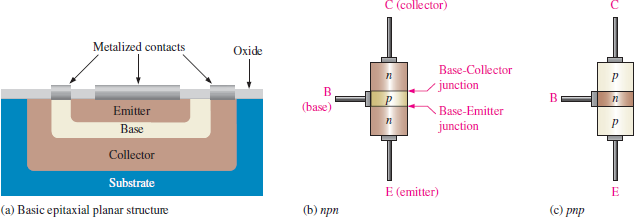
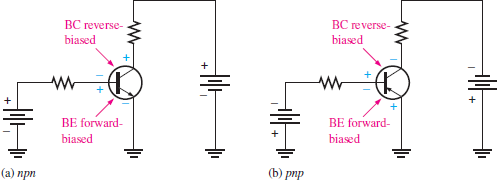

As you can see, the BJT features three electrical contacts. These contacts behave in a certain way and are named as follows:

 - Emitter
    - The most heavily doped of the three semiconductor regions of a BJT.
 - Base
    - The base is very thin and lightly doped compared to the other regions.
 - Collector
    - The largest region of the BJT



When drawing electronic schematics the following symbols are used:

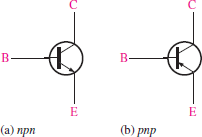

A useful mnemonic for remembering which symbol is which is that for NPN transistors, the arrow is **N**ot **P**ointing i**N**

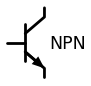

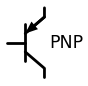

In [16]:
#Once more with schemdraw
with schemdraw.Drawing() as d:
    elm.BjtNpn().label("NPN")

with schemdraw.Drawing() as d:
    elm.BjtPnp().label("PNP")

## How BJTs work

The operation of BJTs takes advantage of the very thin region that makes up the _base_.  When a forward-biased voltage is applied to the *base-emitter* junction, electrons are pushed across the barrier and carried out through the base in a manner similar to that of the diode.  However, as electrons pass through the base region they are also attracted by the positive terminal of the collector (assuming a reverse-biased BC junction), and are able to be swept across, creating a current across the collector and emitter.

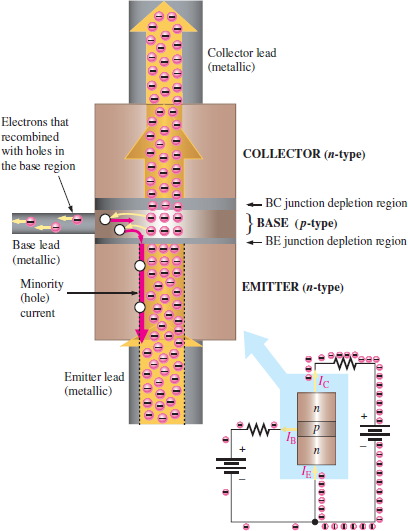

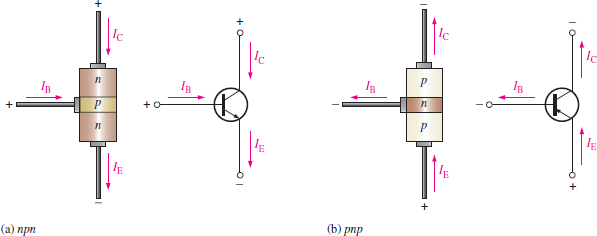

## BJT Characteristics and Parameters

| **r PARAMETERS** | **DESCRIPTION**             | **NOTES**                    |
|------------------|-----------------------------|------------------------------|
| $r'_e$           | ac emitter resistance       | $\approx \frac{25mV}{I_E}$   |
| $r'_b$           | ac base resistance          | typically negligible         |
| $r'_c$           | ac collector resistance     | typically high enough to consider open |
| $\alpha_{ac}$    | ratio of collector and emitter current | $I_c/I_e$         |
| $\beta_{ac}$     | ratio of collector and base current    | $I_c/I_b$         |

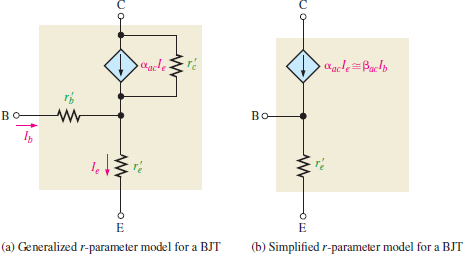


### $\beta_{DC}$ - DC Current Gain

Denoted by the greek letter Beta ($\beta$), the DC current gain is basically a factor of multiplication of the base current ($I_b$) and the collector current ($I_c$).

$$
\beta_{DC} = \frac{I_c}{I_b}
$$

Often, data-sheets will refer to this value using an equivalent hybrid ($h$) parameter: $h_{FE}$ (**H**ybrid parameter **F**orward current gain, common **E**mitter”). Hybrid parameters will be discussed more later, but this is presented here due to its continued prevalence on datasheets.

$$
h_{FE} = \beta_{DC}
$$


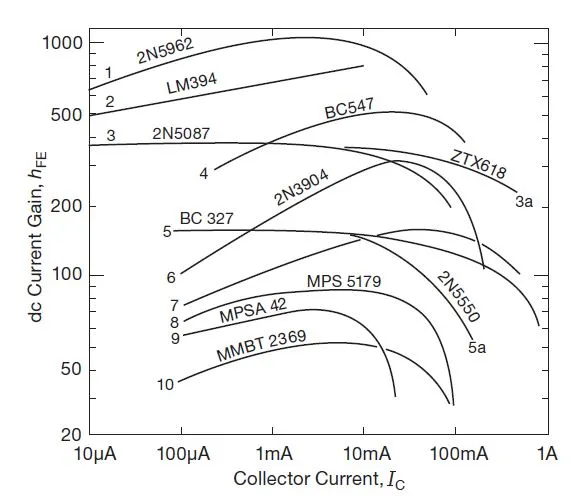

    Curves of typical transistor current gain (hFE). Manufacturer production spreads of +100% to -50% “typical” values are considered acceptable. 
    “The Art of Electronics”, Horowitz and Hill, 3rd edition 2016, page 74.

## $\alpha_{DC}$

Denoted by the greek letter alpha ($\alpha$), this parameter is not widely used, but is mentioned here due to the relationship with $\beta$.  It is the ratio of collector current ($I_c$) to emitter current ($I_e$).

$$
\alpha_{DC} = \frac{I_c}{I_e}
$$

Sometimes coursework will ask you to determine $\alpha_{DC}$ from $\beta_{DC}$.  You can use this relationship to do so:

$$ \alpha_{DC} = \frac{\beta_{DC}}{\beta_{DC} + 1} $$

### This relationship can be derived like this:
1. **Definition of $\alpha_{DC}$**:
   $$ \alpha_{DC} = \frac{I_C}{I_E} $$

2. **Express $I_E$ in terms of $I_C$ and $I_B$**:
   $$ I_E = I_C + I_B $$

3. **Substitute this into the definition of $\alpha_{DC}$**:
   $$ \alpha_{DC} = \frac{I_C}{I_C + I_B} $$

4. **Express $I_B$ in terms of $\beta_{DC}$**:
   $$ I_B = \frac{I_C}{\beta_{DC}} $$

5. **Substitute this expression for $I_B$ back into the equation for $\alpha_{DC}$**:
   $$ \alpha_{DC} = \frac{I_C}{I_C + \frac{I_C}{\beta_{DC}}} $$

6. **Factor out $I_C$ from the denominator**:
   $$ \alpha_{DC} = \frac{I_C}{I_C \left(1 + \frac{1}{\beta_{DC}}\right)} $$

7. **Simplify the fraction by canceling $I_C$ from the numerator and denominator**:
   $$ \alpha_{DC} = \frac{1}{1 + \frac{1}{\beta_{DC}}} $$

8. **Combine the terms in the denominator**:
   The common denominator for the terms in the denominator $1$ and $\frac{1}{\beta_{DC}}$ is $\beta_{DC}$.
   
   $$ 1 + \frac{1}{\beta_{DC}} = \frac{\beta_{DC}}{\beta_{DC}} + \frac{1}{\beta_{DC}} $$

9. **Combine the fractions**:
   $$ 1 + \frac{1}{\beta_{DC}} = \frac{\beta_{DC} + 1}{\beta_{DC}} $$

10. **Substitute back into the expression for $\alpha_{DC}$**:
    $$ 
    \alpha_{DC} = \frac{1}{\frac{\beta_{DC} + 1}{\beta_{DC}}} 
    $$


Thus, the final relationship between $\alpha_{DC}$ and $\beta_{DC}$ is:
$$ \alpha_{DC} = \frac{\beta_{DC}}{\beta_{DC} + 1} $$

## Model analysis

When analyzing a circuit that makes use of a transistor, an ideal *npn* transistor can be modeled as follows:

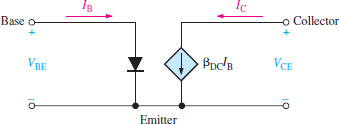

The diamond-shaped current source is a **dependant** current source (Independant sources have a circular symbol) where the amount of current provided is $I_b \cdot \beta_{DC}$

This implies that the base-emitter junction behaves similarly to a forward-biased diode, and indeed it does. In silicon diodes, the barrier potential is $\approx 0.7V$, therefore the voltage drop across the base-emitter junction ($V_{BE}$) will also be $\approx 0.7V$. However, in practical application, the voltage drop is a function of current and can be as high as $0.9V$.

## Circuit analysis

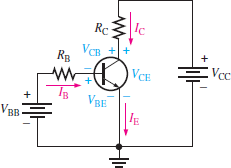

Let's consider this simple circuit.

Using the ideal model above, we know that $V_BE$ is $\approx 0.7V$. Using Kirchoff's voltage law we know that in a given loop the voltages sum to 0, so we can find the voltage across the base resistor $V_{R_B}$.
$$
V_{R_B} = V_{BB}-V_{BE}
$$
This allows us to find the current ${I_B}$:
$$
I_B = \frac{V_{R_B}}{R_B}
$$

This allows us to find $I_C$ using the $\beta$ parameter of the transistor.
$$
I_C = \beta_{DC}*I_B
$$
Which in turn allows us to determine the voltages across $R_C$ and across the CE junction $V_{CE}$.
$$
V_{R_C} = I_C*R_C
$$
$$
V_{CE} = V_{CC} - V_{R_C}
$$

And finally the voltage across the CB junction:
$$
V_{CB} = V_{CE}-V_{BE}
$$

| **Symbol**       | **DESCRIPTION**             | **NOTES**                    |
|------------------|-----------------------------|------------------------------|
| $I_B$            | DC current into base        |  $\frac{V_{BB}-0.7V}{R_B}$   |
| $I_C$            | DC current into collector   |  $\beta_{DC}*I_B$            |
| $I_E$            | DC current out of emitter   |  $I_B+I_C$                   |
| $V_{BE}$           | Voltage from base to emitter |   $\approx 0.7V$          |
| $V_{CE}$           | Voltage from collector emitter | $V_{CC} - V_{R_C}$      |
| $V_{CB}$           | Voltage from collector to base | $V_{CE}-V_{BE}$         |

